# 格点法精确求解多体一维动量分布

总结：
对于该方法来说，多体密度随传播次数的影响已经非常明显了，对于一般的应用来说，原理部分还待更详尽的讨论，我们期望有一个大 P 下的近似原理。
总结大 P 下的近似原理：
对于大P来说，似乎虚部在偶数时是不重要的。
在 P 增长的过程中（T 渐小）越来越趋近于经典分布，与直觉不相符。

using Tullio.jl

In [10]:
# import Pkg; Pkg.add("Tullio")
using Tullio 
using Plots

定义物理量

In [4]:
"""
Atomic Units
"""
ħ = 1.
E_hatree = 1.
k_e = 1.
k_b = 3.1668105084779793e-6
e = 1.
m_e = 1.
m_p = 1.
m_u = 1.
a_0 = 1.

1.0

定义一维双粒子无相互作用系统与哈密顿量

In [5]:
Box = collect(-5:0.1:5)

E_U(x) = x^2-25
E_T(x,y) = 0.5*(x-y)^2

# U = zeros(length(Box),length(Box))
# T = similar(U)

@tullio U[i,j] := 0.5*(E_U(Box[i])+E_U(Box[j]));
@tullio T[i,j] := E_T(Box[i],Box[j]);

画图查看计算

In [6]:
using Printf

"""
    P/β = 1
"""
P = 10^10
𝑇 = 1/(k_b*P)
@printf "beads: %g T: %g" P 𝑇

beads: 1e+10 T: 3.15775e-05

In [ ]:
@tullio par_U[i,j,k,l] := 0.5(U[i,j] + U[k,l])
# @tullio par_T[i,j,k,l] := 0.5*(T[i,j] + T[k,l] - T[i,l] - T[j,k]);

## 二体自由粒子的绘图

矩阵 T

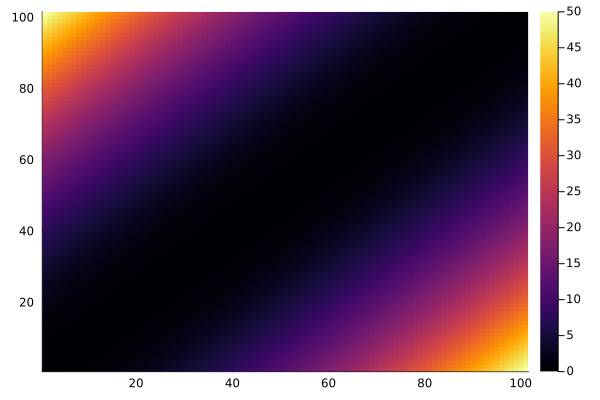

In [8]:
using Plots
heatmap(T)

In [9]:
@tullio par_T_o[i,j] := 0.5*(exp(-(T[i,j] + T[k,l])) - exp(-(T[i,l] + T[k,j])));

### 自传播交换

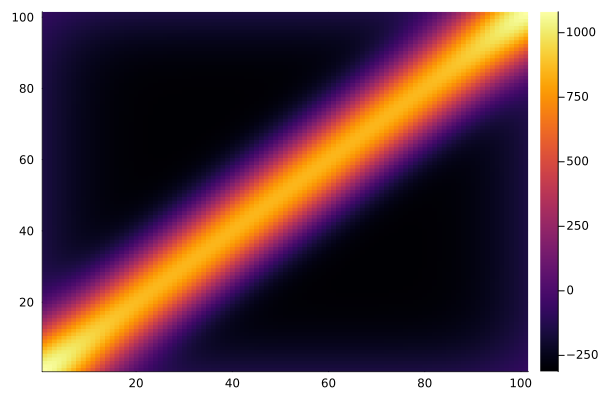

In [10]:
using Plots
heatmap(par_T_o)

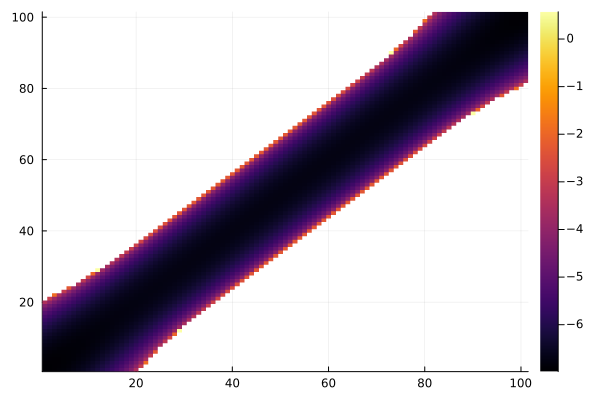

In [11]:
using Plots
@tullio R[i,j] := par_T_o[i,j] > 0 ? -log(par_T_o[i,j]) : NaN
heatmap(R)

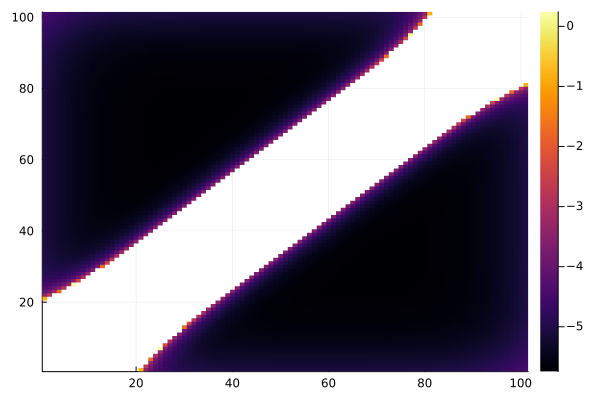

In [12]:
@tullio Im[i,j] := par_T_o[i,j] < 0 ? -log(abs(par_T_o[i,j])) : NaN
heatmap(Im)

在传播回自身来看是交换是平凡的

### 提取动量绘图

准确的结果备用

In [13]:
@tullio par_T_c[i,j,k,l] := 0.5*(exp(-(T[i,j] + T[k,l])) - exp(-(T[i,l] + T[k,j])));

提取动量模型

采用标量索引

In [14]:
E_T(x) = 0.5*(x)^2
𝑝 = E_T.(collect(-10:0.2:10))
@tullio par_T_p[i,j] := 0.5*(exp(-𝑝[i]) - exp(-𝑝[j]));

先看标量索引结果

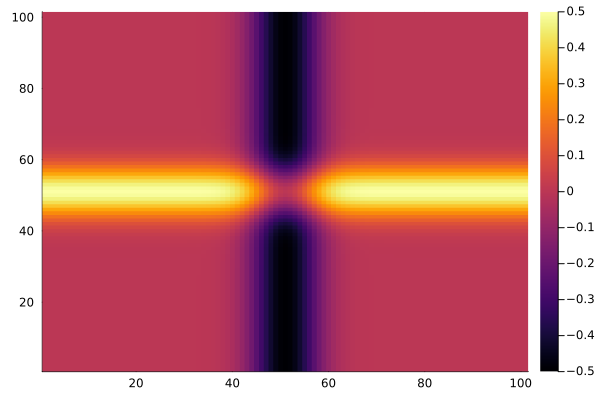

In [15]:
heatmap(par_T_p)

有良好的对称性

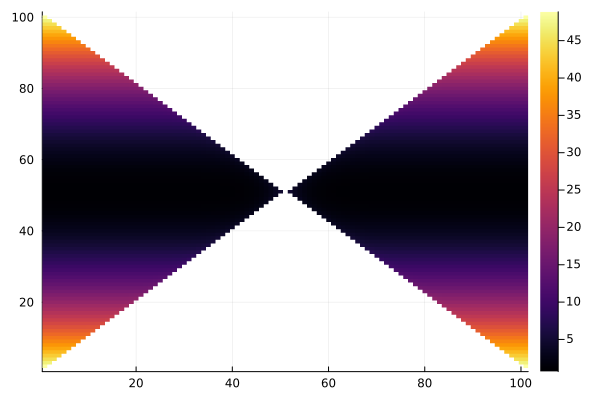

In [16]:
@tullio R[i,j] := par_T_p[i,j] > 0 ? -log(par_T_p[i,j]) : NaN
heatmap(R)

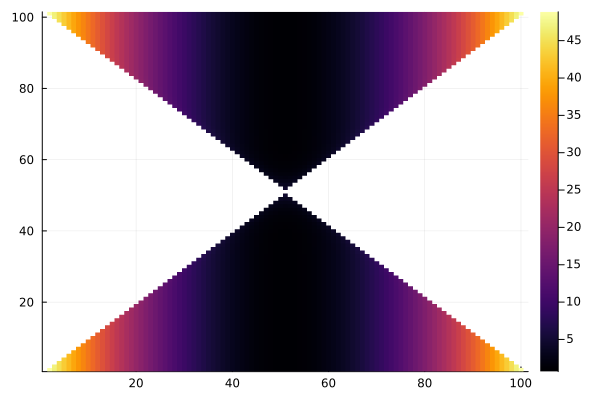

In [17]:
@tullio R[i,j] := par_T_p[i,j] < 0 ? -log(-par_T_p[i,j]) : NaN
heatmap(R)

矢量索引重建

先平均试试

In [22]:
"""
    k,l 均代表位置
"""
@tullio T_p[k,l] := par_T_c[i,j,k,l];

看不出想的

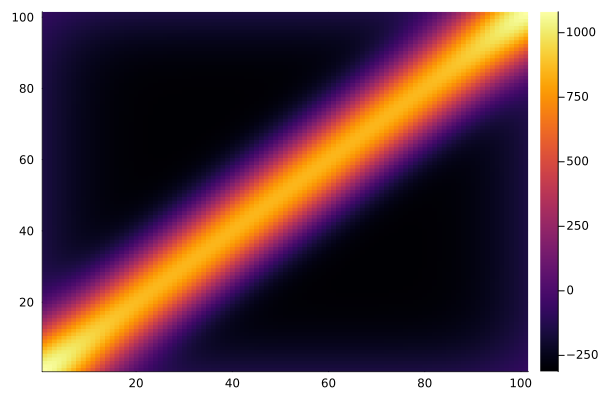

In [23]:
heatmap(T_p)

固定

In [24]:
@tullio par_T_c[i,j,k,l] := 0.5*(exp(-(T[i,j] + T[k,l])) - exp(-(T[i,l] + T[k,j])));
@tullio T_p[k,l] := par_T_c[50,50,k,l];

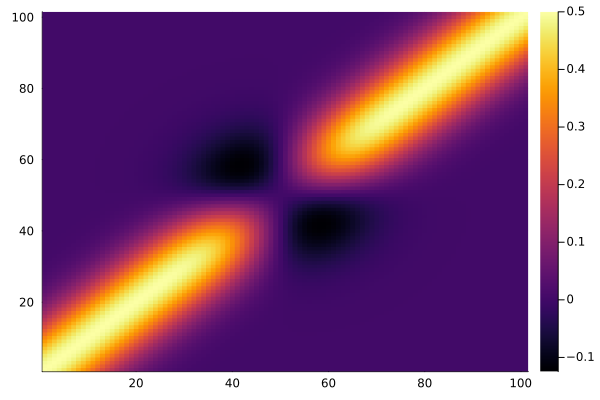

In [21]:
heatmap(T_p)

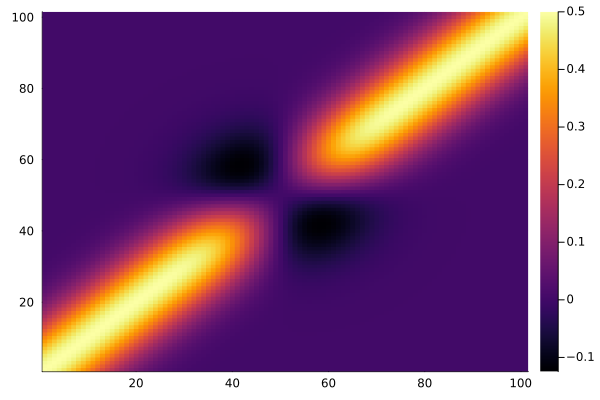

In [26]:
@tullio T_p[i,j] := par_T_c[i,j,50,50];
heatmap(T_p)

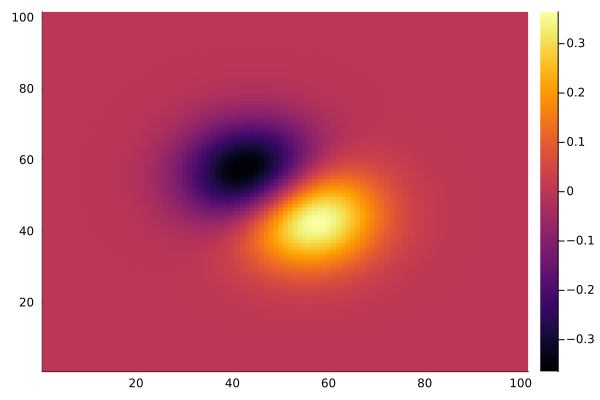

In [27]:
@tullio T_p[j,l] := par_T_c[45,j,55,l];
heatmap(T_p)

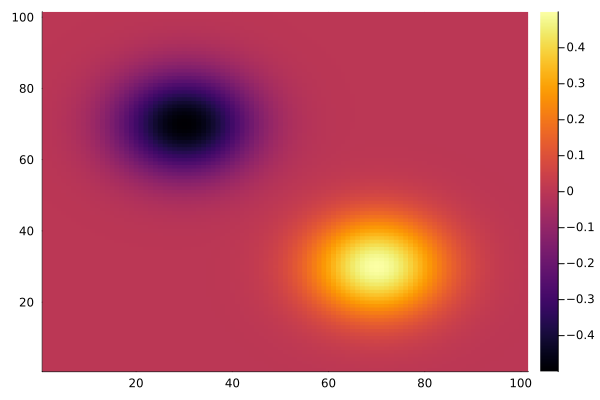

In [28]:
@tullio T_p[j,l] := par_T_c[30,j,70,l];
heatmap(T_p)

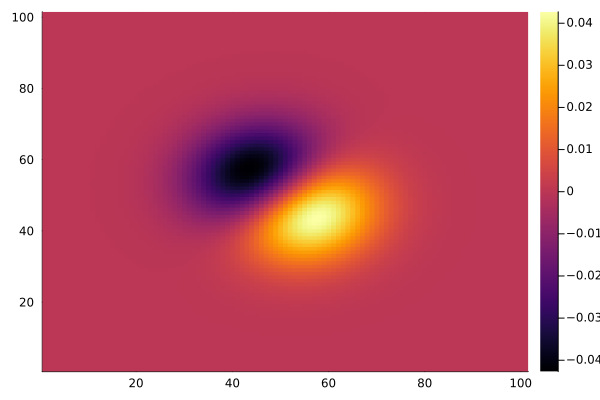

In [29]:
@tullio T_p[j,l] := par_T_c[50,j,51,l];
heatmap(T_p)

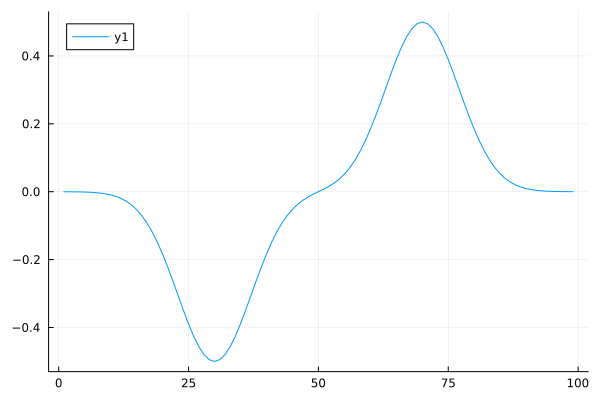

In [30]:
@tullio T_p[i] := par_T_c[70,i,30,100-i];
plot(T_p)

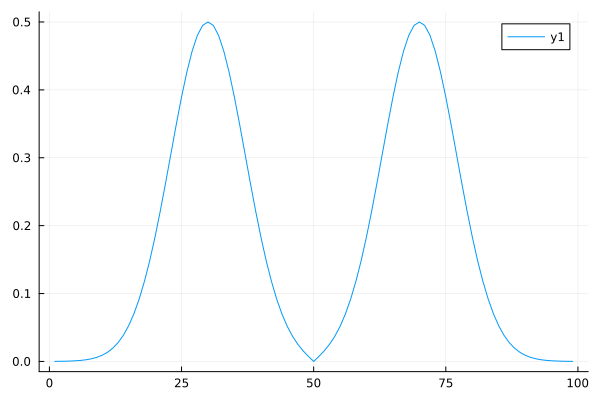

In [31]:
plot(abs.(T_p))

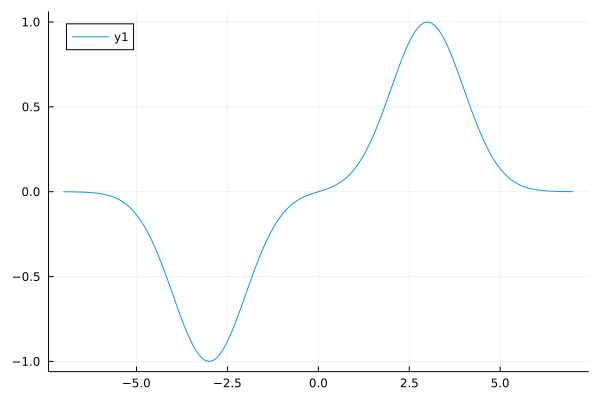

In [32]:
x = -7:0.1:7
f(x) = exp(-(x-3)^2 /2) - exp(-(x+3)^2 /2)
plot(x,f)

对称的情形

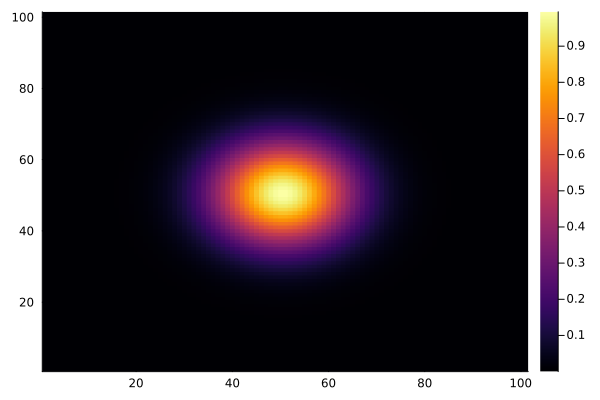

In [33]:
@tullio par_T_o[i,j,k,l] := 0.5*(exp(-(T[i,j] + T[k,l])) + exp(-(T[i,l] + T[k,j])));
@tullio T_p[j,l] := par_T_o[50,j,51,l];
heatmap(T_p)

十分对称的图像

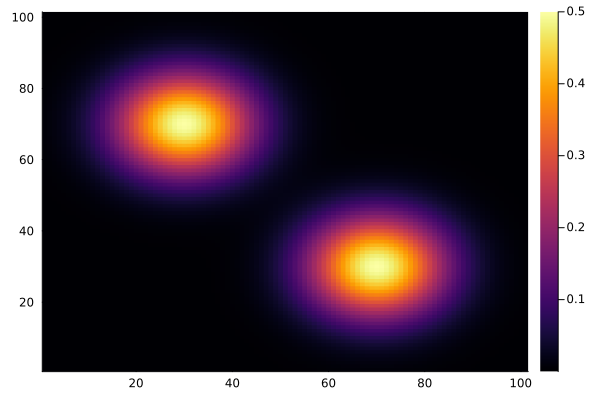

In [34]:
@tullio T_p[j,l] := par_T_o[30,j,70,l];
heatmap(T_p)

### 精确解

In [ ]:
par_T_c

In [ ]:
Pi = zeros(101,101)
@tullio Pi[i,j] += par_T_c[i,j,k,l]  * exp(-par_U[i,j,k,l])

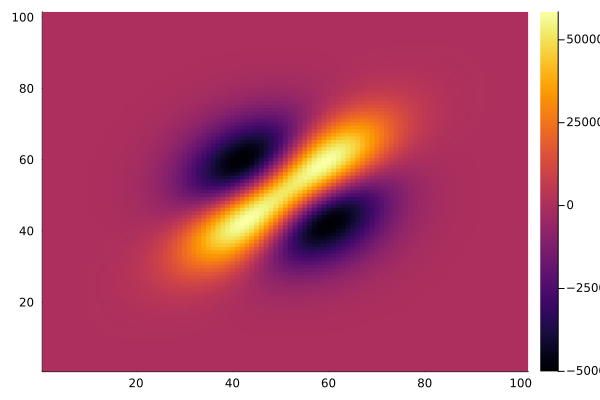

In [39]:
heatmap(Pi)

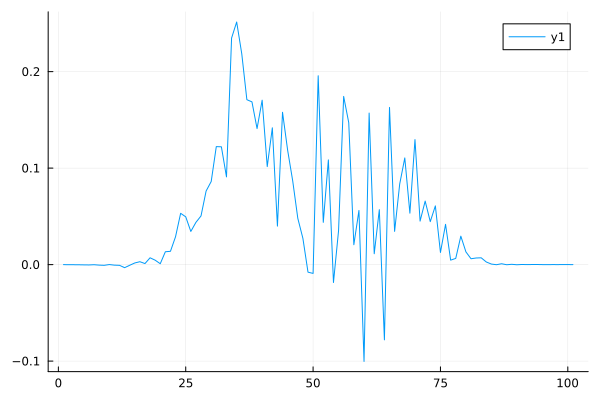

In [40]:
plot(sum(Pi,dims=2))

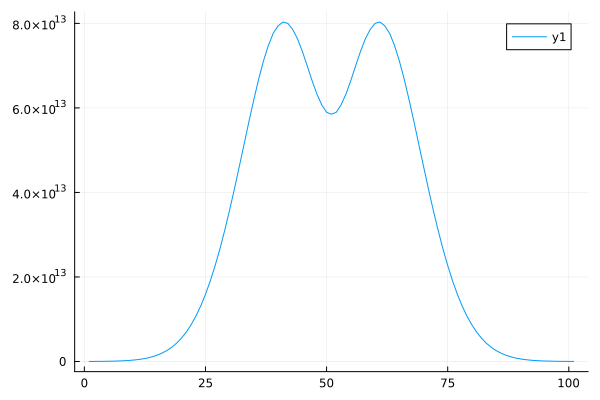

In [41]:
plot(sum(x->(x > 0 ? x : 0.0),Pi,dims=2))

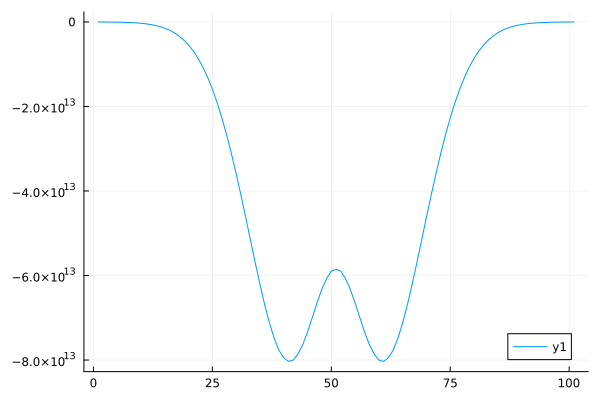

In [42]:
plot(sum(x->(x < 0 ? x : 0.0),Pi,dims=2))

单路径传播子

In [44]:
PI = zeros(101,101,101,101)
@tullio PI[i,j,k,l] += par_T_c[i,j,k,l]  * exp(-par_U[i,j,k,l]);

In [70]:
@tullio PI[i,j,k,l] = (PI[i,j,k,l] == 0 ? 1e-20 : PI[i,j,k,l]);

尝试用 log 运算简化算法

In [69]:
lPI = log.(Complex.(PI));

求得复合路径传播子

CPU ver

In [73]:
@tullio lPI2[i,j,k,l] := lPI[i,j,m,n]  +  lPI[k,l,m,n];

In [74]:
@tullio A[i,j] := exp(lPI2[i,j,k,l]/1000);

观察，似乎与单路径差了一个量

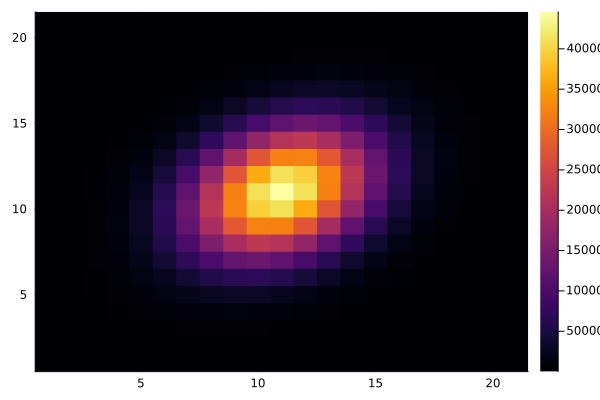

In [45]:
using Plots
using LinearAlgebra
heatmap(imag(A))

比较

这种比较方式我觉得应该是有些许的问题的

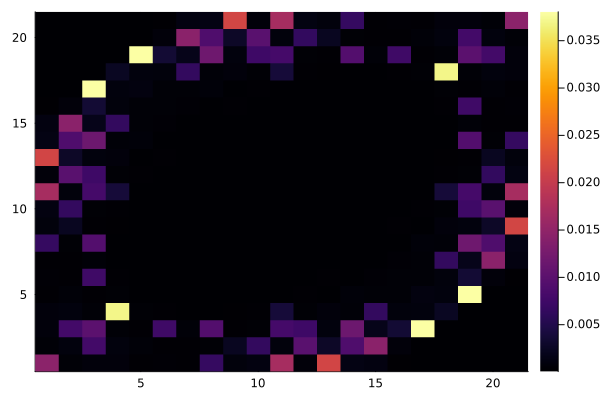

In [85]:
B = abs2.(lPI2 ./ lPI)
B ./= sum(B)
@tullio C[i,j] := B[i,j,k,l]

heatmap(C)

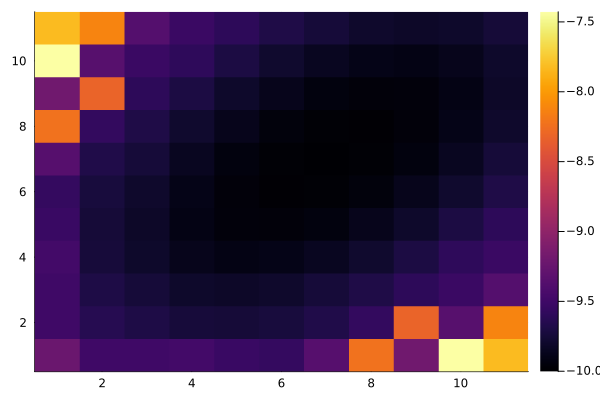

In [88]:
heatmap(log.(C[5:15,5:15]))

实部

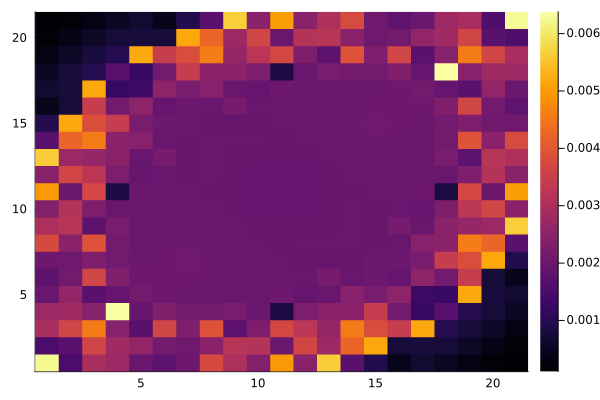

In [81]:
B = real(lPI2 ./ lPI)
B ./= sum(B)
@tullio C[i,j] := B[i,j,k,l]

heatmap(C)

虚部

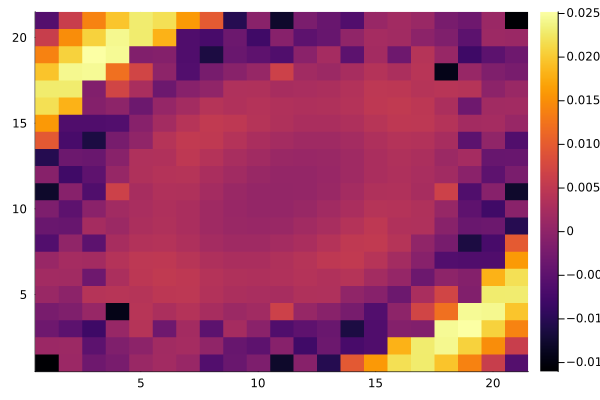

In [83]:
B = imag(lPI2 ./ lPI)
B ./= sum(B)
@tullio C[i,j] := B[i,j,k,l]

heatmap(C)

这种比较方式比较好一点

1.214484578197032785236048152036634696218718248098164233141832200603324158252104e+10084 + 2.856846918401156169715162599522592447054384610278443897822617156985943107129352e+10071im

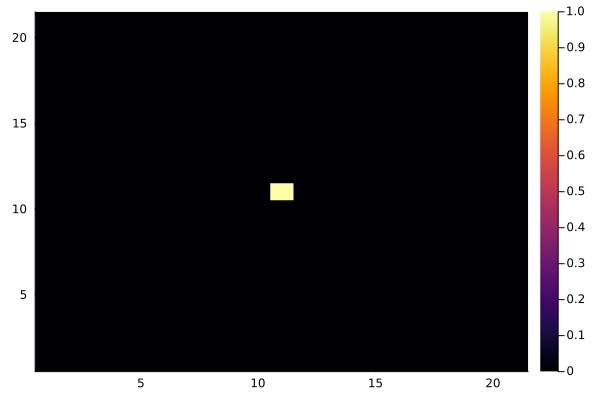

In [94]:
B = exp.(big.(lPI2)) ./ exp.(big.(lPI))
show(sum(B))
B ./= sum(B)
@tullio C[i,j] := real(B[i,j,k,l])
heatmap(C)

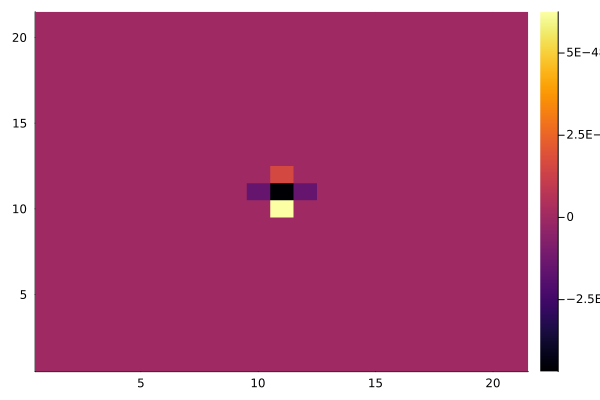

In [95]:
@tullio C[i,j] := imag(B[i,j,k,l])
heatmap(C)

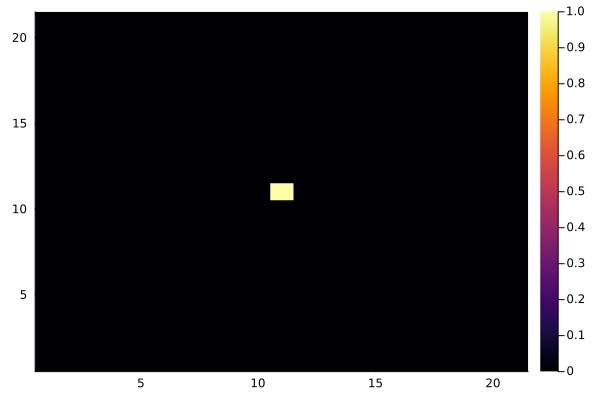

In [96]:
@tullio C[i,j] := abs2(B[i,j,k,l])
heatmap(C)

GPU ver

In [8]:
using CUDA, CUDAKernels, KernelAbstractions
@tullio par_T_c[i,j,k,l] := 0.5*(exp(-(T[i,j] + T[k,l])) - exp(-(T[i,l] + T[k,j])))
PI = zeros(101,101,101,101)
@tullio PI[i,j,k,l] += par_T_c[i,j,k,l]  * exp(-par_U[i,j,k,l]);
# PI ./= abs(sum(PI));

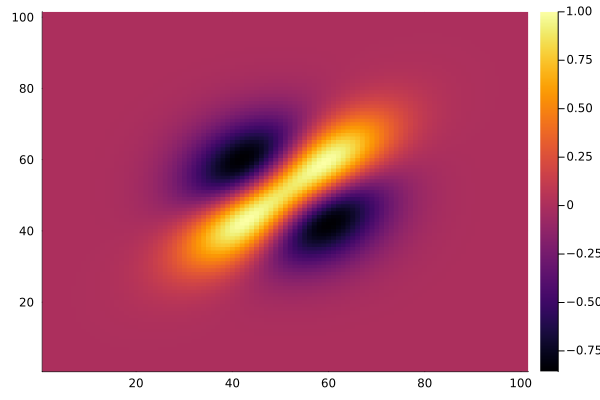

In [11]:
@tullio C[i,j] := PI[i,j,k,l];
heatmap(C./maximum(C))

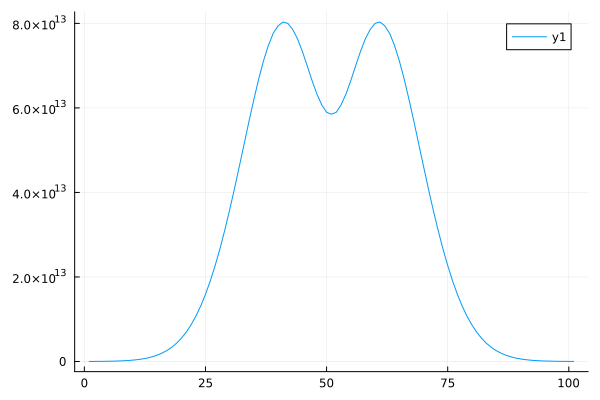

In [22]:
plot(sum(x-> ( x > 0 ? x : 0.0 ) ,C,dims=2))

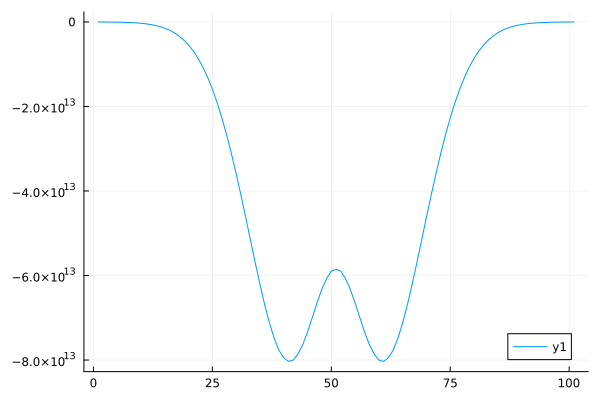

In [23]:
plot(sum(x-> ( x < 0 ? x : 0.0 ) ,C,dims=2))

In [ ]:
PI ./= sum(C)
C_PI = cu(PI)
@tullio PI2[i,j,k,l] := C_PI[i,j,m,n]  *  C_PI[k,l,m,n];
@tullio C_A[i,j] := PI2[i,j,k,l];
PI2 ./= maximum(C_A)

In [138]:
using Plots

In [13]:
C_PI = cu(PI2);

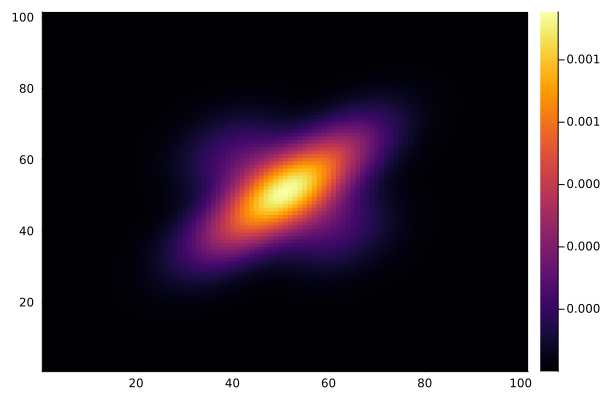

In [15]:
Cp_2 = zeros(101,101)
C_A ./= sum(C_A)
for i in eachindex(C_A)
    Cp_2[i] = C_A[i]
end
heatmap(Cp_2)

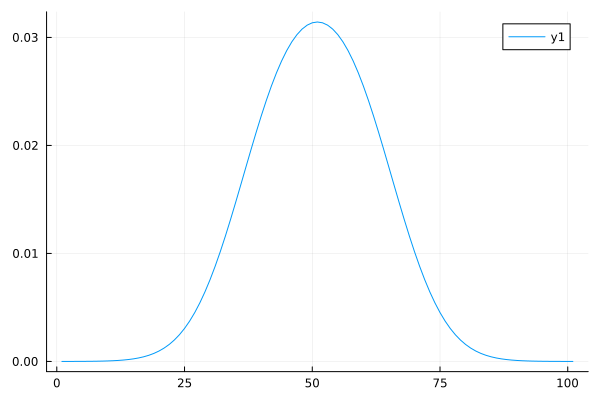

In [21]:
plot(sum(x-> ( x > 0 ? x : 0.0 ) ,Cp_2,dims=2))

In [24]:
C_PI = cu(PI2)
@tullio PI2t2[i,j,k,l] := PI2[i,j,m,n]  *  PI2[k,l,m,n];

In [ ]:
PI2t2 ./= maximum(PI2t2)

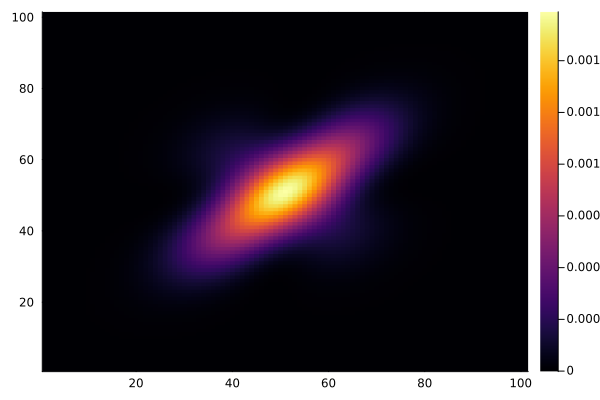

In [27]:
@tullio C_A2[i,j] := PI2t2[i,j,k,l]
Cp_2t2 = zeros(101,101)
for i in eachindex(C_A2)
    Cp_2t2[i] = C_A2[i]
end
Cp_2t2 ./= sum(Cp_2t2)
heatmap(Cp_2t2)

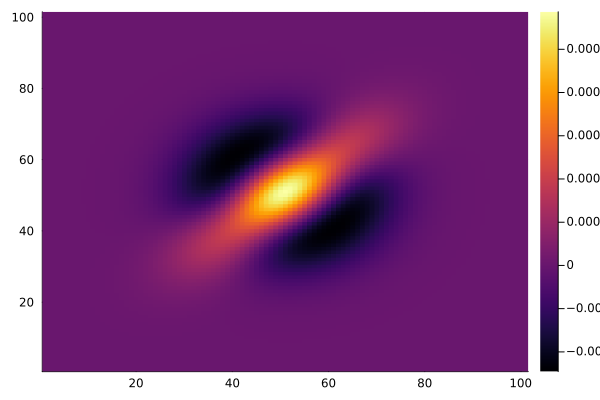

In [28]:
Change = Cp_2t2.-Cp_2
heatmap(Change)

In [29]:
log2(P)

33.219280948873624

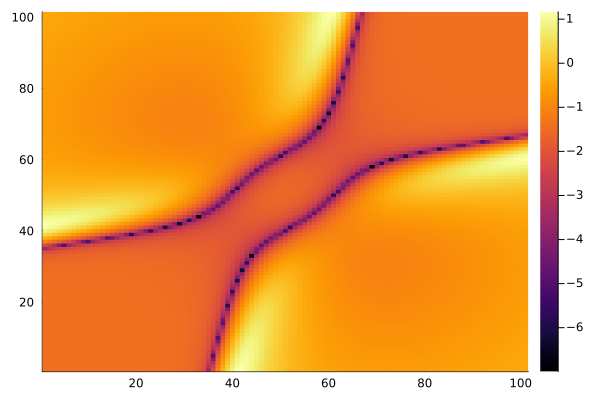

In [30]:
heatmap(log.(abs.(Change./Cp_2)))

迭代

In [35]:
@tullio PI_P[i,j,k,l] := PI2[i,j,m,n]  *  PI2[k,l,m,n];
max = maximum(PI_P_)

LoadError: Out of GPU memory trying to allocate 396.959 MiB
Effective GPU memory usage: 100.00% (2.000 GiB/2.000 GiB)
Memory pool usage: 1.551 GiB (2.000 GiB reserved)


In [ ]:
PI_P_ = similar(PI_P)
@tullio PI_P_[i,j,k,l] := PI_P[i,j,k,l] / max;

In [ ]:
# @tullio PI_P_[i,j,k,l] := PI_P[i,j,m,n]  *  PI_P[k,l,m,n]
# for i in 1:30
    @tullio PI_P_[i,j,k,l] = PI_P[i,j,m,n]  *  PI_P[k,l,m,n]
    max = maximum(PI_P_)
    @tullio PI_P[i,j,k,l] = PI_P_[i,j,k,l] / max;
# end
# PI_P = PI_P_ ./ maximum(PI_P_)

In [236]:
function obs_Per(P)
    @tullio C_p[i,j] := P[i,j,i,j];
    # C_p ./= sum(C_p);
    P = zeros(51,51)
    for i in eachindex(C_p)
        P[i] = C_p[i]
    end
    heatmap(P)
end

obs_Per (generic function with 1 method)

In [280]:
@tullio C_A[i,j] := PI_P[i,j,k,l];
C_A ./= sum(C_A);

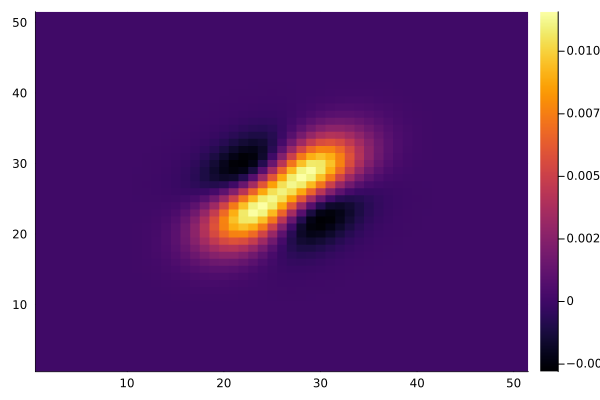

In [282]:
Cp_P = zeros(51,51)
for i in eachindex(C_A)
    Cp_P[i] = C_A[i]
end
heatmap(Cp_P)

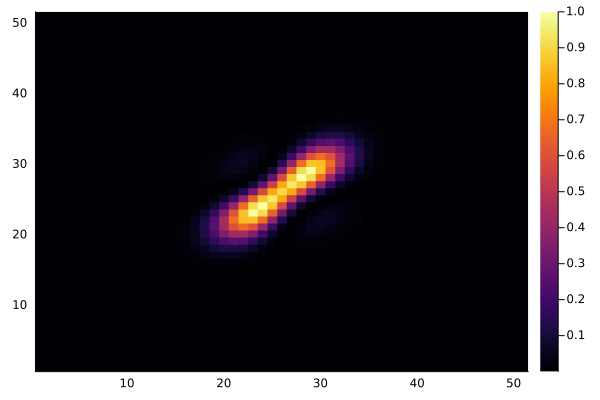

In [256]:
obs_Per(PI_P)

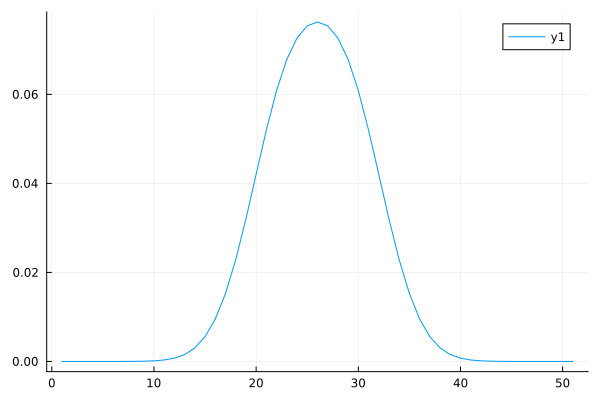

In [284]:
plot(sum(Cp_P,dims=2))

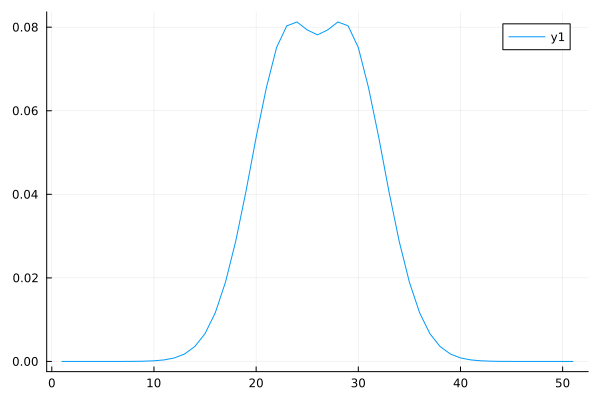

In [285]:
plot(sum(x->(x > 0 ? x : 0.0),Cp_P,dims=2))

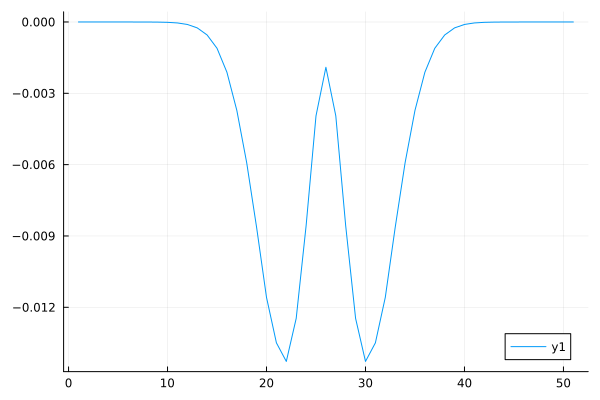

In [286]:
plot(sum(x->(x < 0 ? x : 0.0),Cp_P,dims=2))

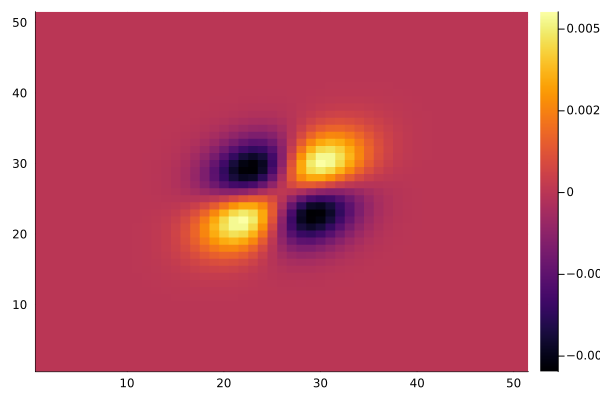

In [247]:
heatmap(Cp_P.-Cp_2t2)

In [2]:
"""
import Pkg; Pkg.add("CUDA")
import Pkg; Pkg.add("CUDAKernels")
import Pkg; Pkg.add("KernelAbstractions")
"""

    Updating registry at `C:\Users\clock\.julia\registries\General.toml`
   Resolving package versions...
    Updating `C:\Users\clock\.julia\environments\v1.8\Project.toml`
⌅ [052768ef] + CUDA v3.13.1
  No Changes to `C:\Users\clock\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
   Installed CUDAKernels ─ v0.4.7
    Updating `C:\Users\clock\.julia\environments\v1.8\Project.toml`
  [72cfdca4] + CUDAKernels v0.4.7
    Updating `C:\Users\clock\.julia\environments\v1.8\Manifest.toml`
  [72cfdca4] ↑ CUDAKernels v0.4.4 ⇒ v0.4.7
Precompiling project...
  ✓ CUDAKernels
  ✓ LuxLib
  ✓ Lux
  ✓ DiffEqFlux
  4 dependencies successfully precompiled in 442 seconds. 451 already precompiled. 2 skipped during auto due to previous errors.
   Resolving package versions...
    Updating `C:\Users\clock\.julia\environments\v1.8\Project.toml`
  [63c18a36] + KernelAbstractions v0.8.6
  No Changes to `C:\Users\clock\.julia\environments\v1.8\Manifest.toml`


In [3]:
using CUDA, CUDAKernels, KernelAbstractions

### GPU

In [5]:
using Tullio
mul(A, B) = @tullio C[i,k] := A[i,j] * B[j,k]

A = rand(3,1000); B = rand(1000,500);
# A * B ≈ mul(A, B) # true

# using Tracker # or Zygote
# ΔA = Tracker.gradient((A,B) -> sum(mul(A, B)), A, B)[1]
# ΔA ≈ ones(3,500) * B' # true

using CUDA, CUDAKernels, KernelAbstractions # Now defined with a GPU version:
mul(A, B) = @tullio C[i,k] := A[i,j] * B[j,k]

cu(A * B) ≈ mul(cu(A), cu(B)) # true

# cu(ΔA) ≈ Tracker.gradient((A,B) -> sum(mul(A, B)), cu(A), cu(B))[1] # true

# # Reduction over min/max:
# Tracker.gradient(x -> (@tullio (max) res := x[i]^3), [1,2,3,-2,-1,3])[1]

true

In [3]:
using BenchmarkTools
A = rand(1000,1000); B = rand(1000,1000);
@benchmark @tullio C[i,k] := A[i,j] * B[j,k]

BenchmarkTools.Trial: 5 samples with 1 evaluation.
 Range (min … max):  1.005 s …   1.096 s  ┊ GC (min … max): 0.00% … 0.00%
 Time  (median):     1.047 s              ┊ GC (median):    0.00%
 Time  (mean ± σ):   1.043 s ± 38.086 ms  ┊ GC (mean ± σ):  0.00% ± 0.00%

  ██                        █       █                     █  
  ██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  1 s            Histogram: frequency by time         1.1 s <

 Memory estimate: 7.63 MiB, allocs estimate: 2.

In [4]:
using CUDA, CUDAKernels, KernelAbstractions
mul(A, B) = @tullio C[i,k] := A[i,j] * B[j,k]
@benchmark mul(cu(A), cu(B))

BenchmarkTools.Trial: 77 samples with 1 evaluation.
 Range (min … max):   4.593 ms … 74.613 ms  ┊ GC (min … max): 0.00% … 7.17%
 Time  (median):     65.678 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   65.473 ms ±  7.289 ms  ┊ GC (mean ± σ):  0.89% ± 2.40%

                                                       █       
  ▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃██▁▂▂▄ ▁
  4.59 ms         Histogram: frequency by time        71.6 ms <

 Memory estimate: 7.63 MiB, allocs estimate: 128.

In [98]:
using CUDA
CUDA.versioninfo()

CUDA toolkit 11.7, artifact installation
NVIDIA driver 528.49.0, for CUDA 12.0
CUDA driver 12.0

Libraries: 
- CUBLAS: 11.10.1
- CURAND: 10.2.10
- CUFFT: 10.7.1
- CUSOLVER: 11.3.5
- CUSPARSE: 11.7.3
- CUPTI: 17.0.0
- NVML: 12.0.0+528.49
- CUDNN: 8.30.2 (for CUDA 11.5.0)
- CUTENSOR: 1.4.0 (for CUDA 11.5.0)

Toolchain:
- Julia: 1.8.4
- LLVM: 13.0.1
- PTX ISA support: 3.2, 4.0, 4.1, 4.2, 4.3, 5.0, 6.0, 6.1, 6.3, 6.4, 6.5, 7.0, 7.1, 7.2
- Device capability support: sm_35, sm_37, sm_50, sm_52, sm_53, sm_60, sm_61, sm_62, sm_70, sm_72, sm_75, sm_80, sm_86

1 device:
  0: NVIDIA GeForce MX250 (sm_61, 1.936 GiB / 2.000 GiB available)


369.86301369863014

### 一维动量解得

In [312]:
@tullio PI_L[i,j] := par_T_c[i,j,m,n]  * exp(-par_U[i,j,m,n]);

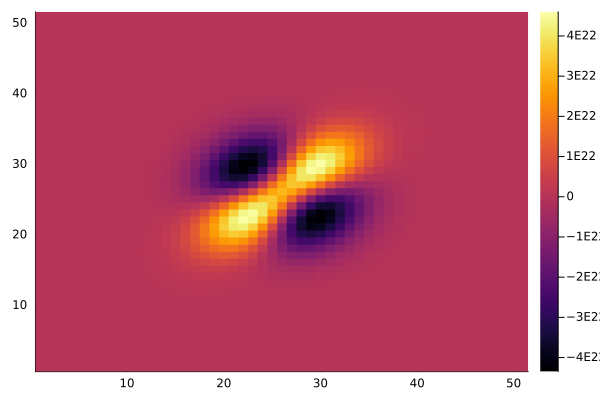

In [313]:
heatmap(PI_L)

## 三体自由粒子的绘图

In [ ]:
定义一维自由粒子系统

In [37]:
Box = collect(-2.5:0.3:2.5)

using LinearAlgebra
using Tullio

f(a) = box[a]
E_U(a) = a^2 - 25
E_T(a,b) = 0.5*(a-b)^2

@tullio EU[i,io] := 0.5*(E_U(Box[i]) + E_U(Box[io]))
@tullio ET[i,io] := E_T(Box[i],Box[io])

@tullio U[i,j,k,io,jo,ko] := EU[i,io] + EU[j,jo] + EU[k,ko];
@tullio T[i,j,k,io,jo,ko] := ET[i,io] + ET[j,jo] + ET[k,ko];

In [38]:
using Plots

一次传播子

In [ ]:
@tullio PI[i,j,k,io,jo,ko] := exp(-U[i,j,k,io,jo,ko]) * 
                                (
                                    exp(-T[i,j,k,io,jo,ko]) -
                                    exp(-T[i,k,j,io,jo,ko]) +
                                    exp(-T[j,i,k,io,jo,ko]) -
                                    exp(-T[j,k,i,io,jo,ko]) +
                                    exp(-T[k,i,j,io,jo,ko]) -
                                    exp(-T[k,j,i,io,jo,ko]) 
                                )/6  

二次传播子

In [ ]:
PI /= maximum(C_P)

In [105]:
CUDA.reclaim()
CUDA.memory_status()

Effective GPU memory usage: 88.45% (1.769 GiB/2.000 GiB)
Memory pool usage: 1.325 GiB (1.375 GiB reserved)


In [ ]:
using CUDA, CUDAKernels, KernelAbstractions
C_P = cu(PI)
@tullio PI2[i,j,k,io,jo,ko] := C_P[i,j,k,m,n,o] * C_P[m,n,o,io,jo,ko]

In [136]:
function obs_Per(P)
    @tullio C_p[i,j] := P[i,m,n,j,o,k];
    heatmap(Array(C_p))
    # plot(sum(x-> (x > 0 ? x : -x) ,Array(C_p),dims=2))
end

obs_Per (generic function with 1 method)

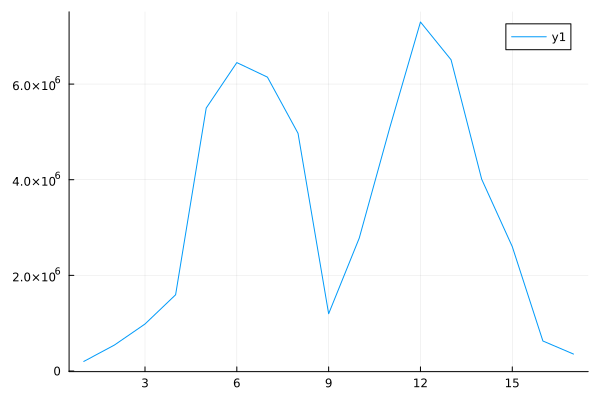

In [137]:
obs_Per(PI6)

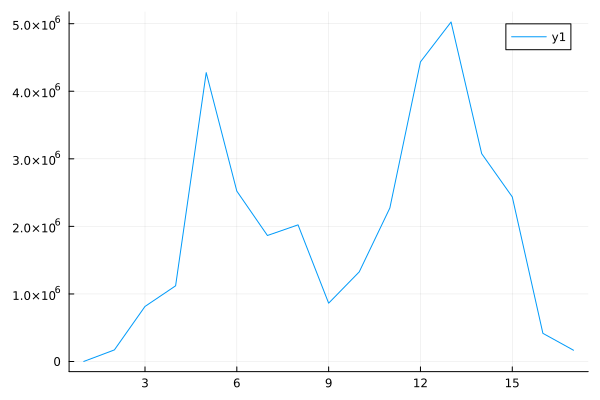

In [133]:
obs_Per(PI6)

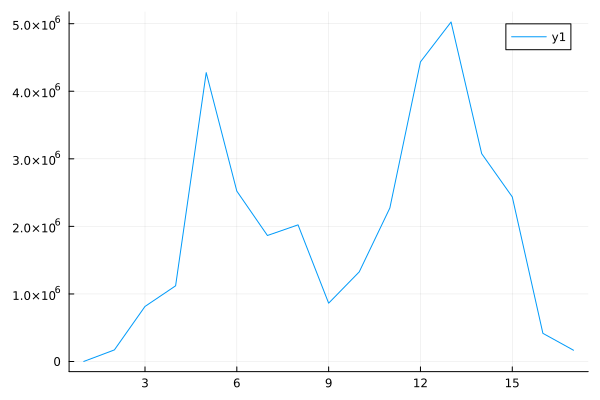

In [132]:
obs_Per(PI6)

In [121]:
maximum(PI12)

3.2102294f19

In [120]:
minimum(PI12)

-3.2102294f19

In [ ]:
# C_P = cu(PI)
@tullio PI12[i,j,k,io,jo,ko] := PI6[i,j,k,m,n,o] * PI6[m,n,o,io,jo,ko]

In [96]:
using JLD2

In [122]:
@save "PI12" PI12 

定义二维自由粒子系统——无法合理时间得到精确解

In [342]:
box = collect(-10:0.5:10)

using LinearAlgebra

f(a) = box[a]
E_U(a) = sum(abs2,a) - 25
E_T(a,b) = 0.5*(norm(a)-norm(b))^2

Box = zeros(length(box),length(box))

@tullio U[ix,iy,jx,jy,kx,ky,ixo,iyo,jxo,jyo,kxo,kyo] := 0.5*(E_U([box[i],box[j]])+E_U([box[k],box[l]]));
@tullio T[i,j,k,l,m,n] := E_T([box[i],box[j]],[box[k],box[l]]);

In [ ]:
using Plots

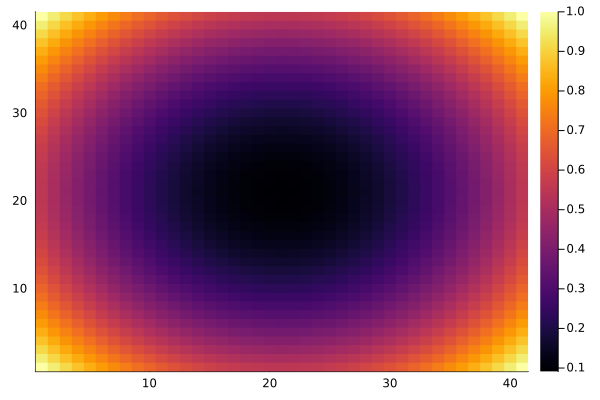

In [347]:
@tullio Tem[i,j] := 0.5*(E_U([box[i],box[j]])+E_U([box[k],box[l]]));
heatmap(Tem./maximum(Tem))

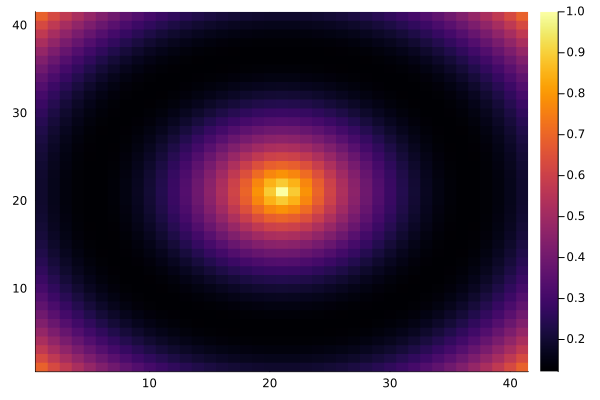

In [346]:
@tullio Tem[i,j] := E_T([box[i],box[j]],[box[k],box[l]]);
heatmap(Tem./maximum(Tem))